In [1]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
session = fastf1.get_session(2023, 'Monza', 'Q')

req         WARNING 	DEFAULT CACHE ENABLED! (94.1 MB) /Users/flo/Library/Caches/fastf1


In [2]:
session.load(telemetry=True, laps=True, weather=False)

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']


In [3]:
laps = session.laps
drivers = session.drivers

In [4]:
circuit_info = session.get_circuit_info()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [5]:
a_corner = pd.DataFrame(circuit_info.corners.iloc[0]).T

In [6]:
lap_55_1 = laps.pick_driver('55').pick_lap(1).get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [7]:
lap_55_2 = laps.pick_driver('55').pick_lap(2).get_telemetry()

In [8]:
lap_55_1 = lap_55_1[lap_55_1['Source'] == 'car']
lap_55_2 = lap_55_2[lap_55_2['Source'] == 'car']

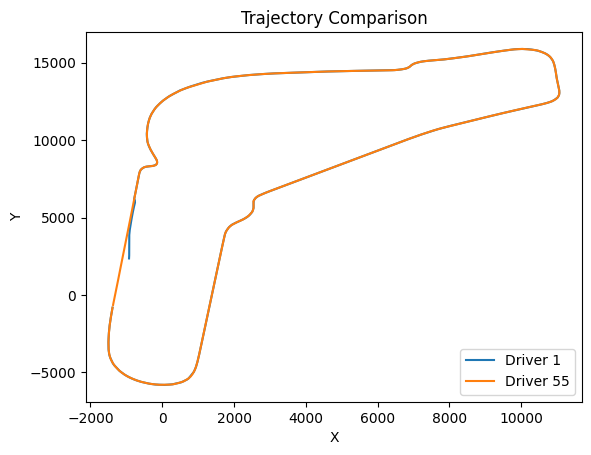

In [9]:
plt.plot(lap_55_1['X'], lap_55_1['Y'], label='Driver 1')
plt.plot(lap_55_2['X'], lap_55_2['Y'], label='Driver 55')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory Comparison')
plt.legend()  # Show legend with labels

plt.show()


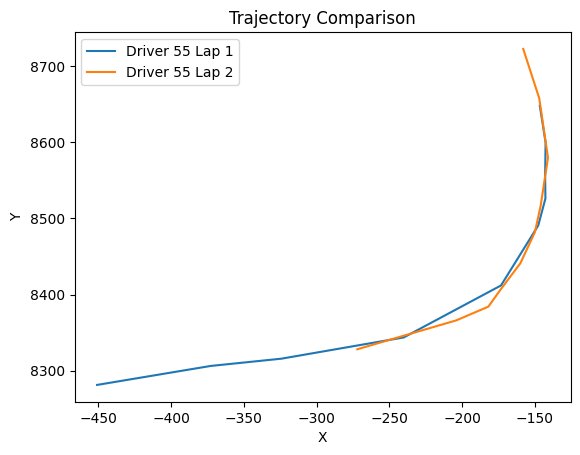

In [10]:
plt.plot(lap_55_1['X'][80:90], lap_55_1['Y'][80:90], label='Driver 55 Lap 1')
plt.plot(lap_55_2['X'][45:55], lap_55_2['Y'][45:55], label='Driver 55 Lap 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory Comparison')
plt.legend()  # Show legend with labels

plt.show()

In [11]:
driver_55 = laps.pick_driver('55').get_telemetry()
driver_16 = laps.pick_driver('16').get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [64]:
test = dict()
for i in drivers:
    test[i] = laps.pick_driver(i).pick_lap(1).get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [131]:
modified_dfs = []

# Iterate through the dictionary
for key, df in test.items():
    # Replicate the key as a new column for all rows in the dataframe
    df['driver'] = key
    # Append the modified dataframe to the list
    modified_dfs.append(df)

# Concatenate all modified dataframes into a single dataframe
concatenated_df = pd.concat(modified_dfs)

# Reset index if needed
concatenated_df.reset_index(drop=True, inplace=True)

In [132]:
# concatenated_df = concatenated_df[concatenated_df['Source'] == 'car']

In [133]:
plot_test = concatenated_df[['X','Y','driver']].reset_index(drop = True)

In [128]:
plot_test = plot_test[(plot_test['X'] > plot_test[plot_test['driver'] == '55'][30:60].reset_index(drop=True).iloc[0]['X']) & 
                      (plot_test['X'] < plot_test[plot_test['driver'] == '55'][30:60].reset_index(drop=True).iloc[9]['X']) & 
                      (plot_test['Y'] > plot_test[plot_test['driver'] == '55'][30:60].reset_index(drop=True).iloc[0]['Y']) &
                      (plot_test['Y'] < plot_test[plot_test['driver'] == '55'][30:60].reset_index(drop=True).iloc[9]['Y']) ]

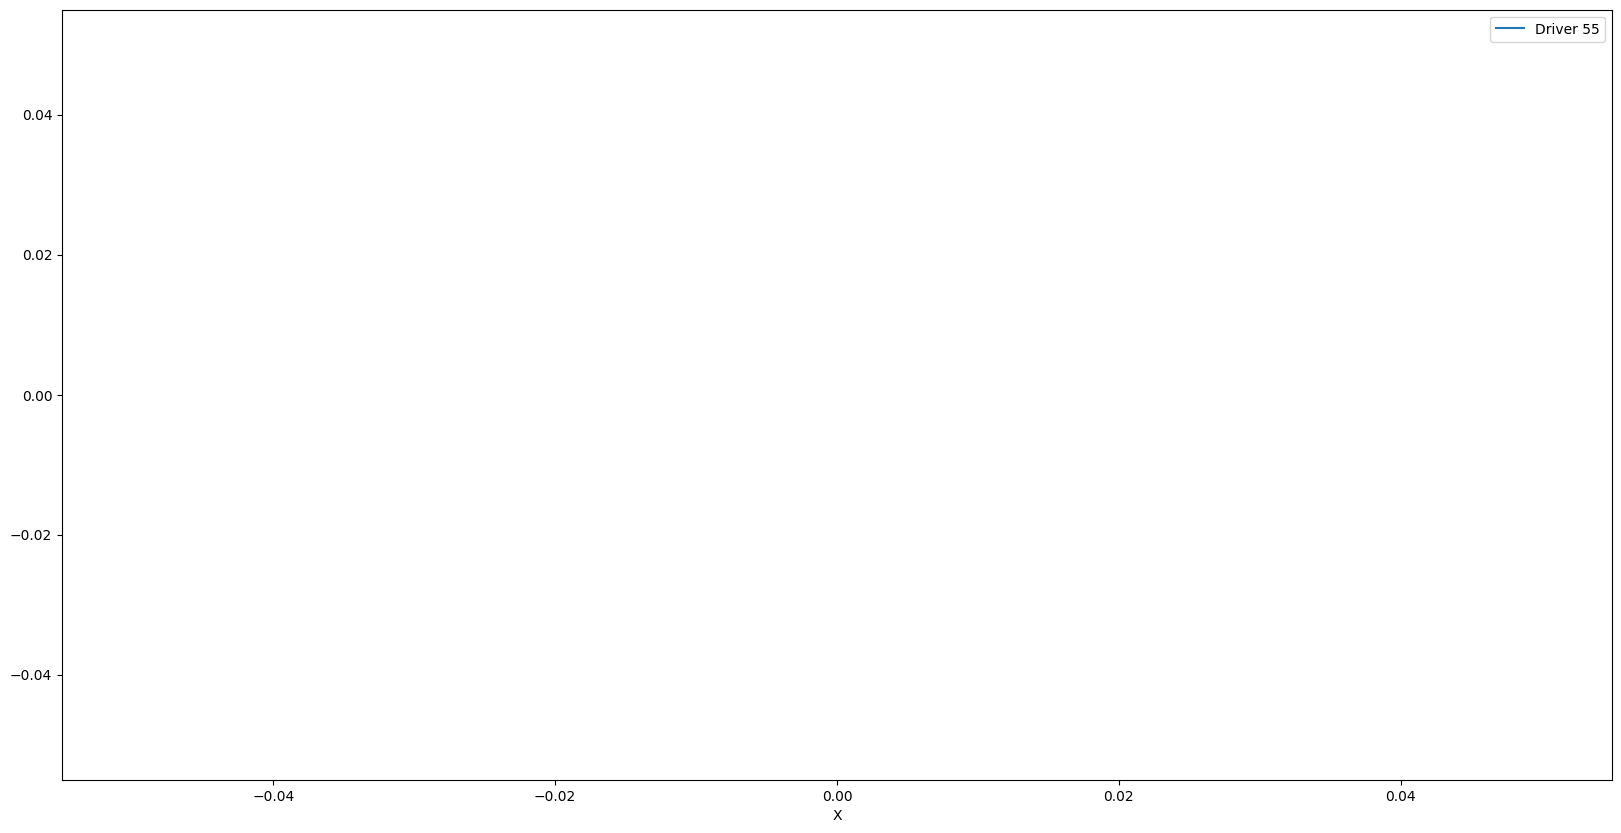

In [129]:
ax = plot_test[plot_test['driver'] == '55'].plot(x = 'X', y = 'Y', label = 'Driver 55',figsize = (20,10))
def plot_multiple(driver):
    plot_test[plot_test['driver'] == driver].plot(x = 'X', y = 'Y', ax=ax, label = f'Driver {driver}',figsize = (20,10));
for i in set(plot_test['driver']):
    plot_multiple(i)

In [ ]:
driver_55 = driver_55[driver_55['Source'] == 'car']
driver_16 = driver_16[driver_16['Source'] == 'car']

In [ ]:
plt.plot(driver_16['X'], driver_16['Y'], label='Driver 1')
plt.plot(driver_55['X'], driver_55['Y'], label='Driver 55')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory Comparison')
plt.legend()  # Show legend with labels

plt.show()


In [ ]:
plt.plot(driver_55['X'][105:110], driver_55['Y'][105:110], label='Driver 55')
plt.plot(driver_16['X'][97:101], driver_16['Y'][97:101], label='Driver 16')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory Comparison')
plt.legend()  # Show legend with labels

plt.show()

In [ ]:
import geopandas as gpd
data = gpd.read_file('f1-circuits/f1-circuits.geojson')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # Larger size for GeoPandas plot

# Plot GeoJSON data on ax1
data[data['Location'] == 'Monza'].plot(ax=ax1, color='blue')
ax1.set_aspect('equal')  # Make aspect ratio equal

# Plot driver trajectories on ax2
ax2.plot(driver_1['X'], driver_1['Y'], label='Driver 1')
ax2.plot(driver_55['X'], driver_55['Y'], label='Driver 55')
ax2.set_aspect('equal')  # Make aspect ratio equal

# Customize axis labels, titles, and legend
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('GeoJSON Geometry')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Driver Trajectories')
ax2.legend()  # Show legend with labels

plt.tight_layout()  # Adjust layout for better appearance

plt.show()

In [ ]:
# Create a figure and subplots with different aspect ratios
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot GeoJSON data on ax1
data[data['Location'] == 'Monza'].plot(ax=ax1, color='blue')
ax1.set_aspect('equal')  # Make aspect ratio equal

# Plot driver trajectories on ax2
ax2.plot(driver_55['X'], driver_55['Y'], label='Driver 55')
ax2.plot(driver_1['X'], driver_1['Y'], label='Driver 1')
ax2.set_aspect('equal')  # Make aspect ratio equal

# Customize axis labels, titles, and legend
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('GeoJSON Geometry')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Driver Trajectories')
ax2.legend()  # Show legend with labels

plt.tight_layout()  # Adjust layout for better appearance

plt.show()